<a href="https://colab.research.google.com/github/yasumorishima/mlb-data-analysis/blob/main/ohtani_batting_analysis_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://baseballsavant.mlb.com/savant-player/shohei-ohtani-660271?stats=gamelogs-r-pitching-mlb&season=2023

In [ ]:
!pip install pybaseball

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.0/420.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.1/342.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 41.9 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [ ]:
from pybaseball import statcast
import pandas as pd

In [ ]:
df = statcast(start_dt='2022-03-30', end_dt='2022-12-31')
df_ohtani = df[df['batter'] == 660271]

This is a large query, it may take a moment to complete


/usr/local/lib/python3.10/dist-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)


Skipping offseason dates


100%|██████████| 231/231 [05:20<00:00,  1.39s/it]


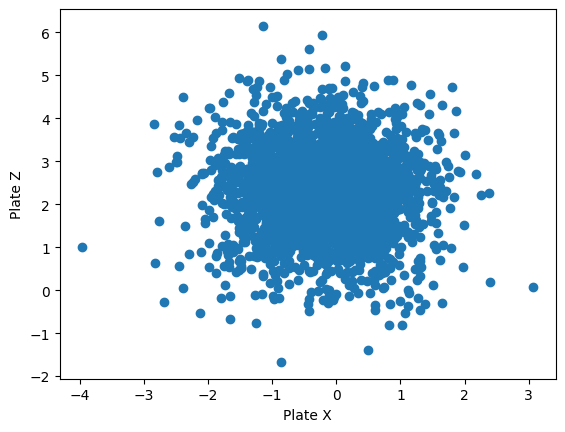

In [ ]:
# 打ったコースの確認

import matplotlib.pyplot as plt

# create scatter plot using 'plate_x' and 'plate_z' columns
df_ohtani = df_ohtani.dropna(subset=['plate_x','plate_z'])
plt.scatter(df_ohtani['plate_x'], df_ohtani['plate_z'])

# add labels for x and y axis
plt.xlabel('Plate X')
plt.ylabel('Plate Z')

# show the plot
plt.show()


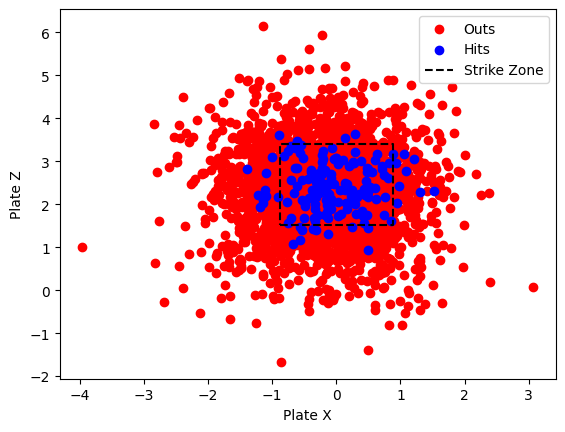

In [ ]:
# イベントタイプに基づいてデータを分割
hits = df_ohtani[df_ohtani['events'].isin(['single', 'double', 'triple', 'home_run'])]
outs = df_ohtani[~df_ohtani['events'].isin(['single', 'double', 'triple', 'home_run'])]

# 散布図に色分けしてデータをプロット
plt.scatter(outs['plate_x'], outs['plate_z'], color='red', label='Outs')
plt.scatter(hits['plate_x'], hits['plate_z'], color='blue', label='Hits')

# ストライクゾーンを追加 (黒い点線の枠線)
x = [-0.88, 0.88, 0.88, -0.88, -0.88]
y = [1.51, 1.51, 3.4, 3.4, 1.51]
plt.plot(x, y, color='black', linestyle='--', label='Strike Zone')

# X軸とY軸にラベルを追加
plt.xlabel('Plate X')
plt.ylabel('Plate Z')

# 凡例を追加
plt.legend()

# 散布図を表示
plt.show()


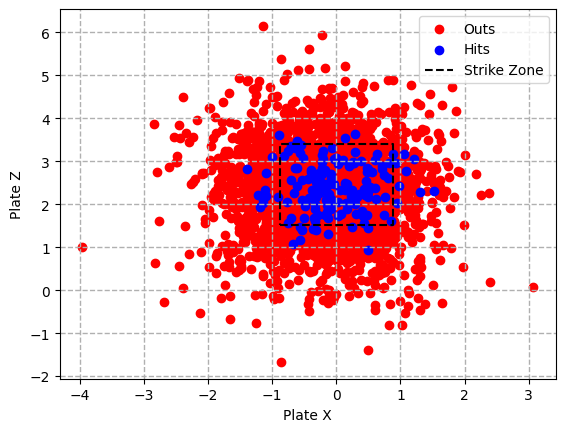

In [ ]:
# 散布図に色分けしてデータをプロット
fig, ax = plt.subplots()
ax.scatter(outs['plate_x'], outs['plate_z'], color='red', label='Outs')
ax.scatter(hits['plate_x'], hits['plate_z'], color='blue', label='Hits')

# ストライクゾーンを追加 (黒い点線の枠線)
x = [-0.88, 0.88, 0.88, -0.88, -0.88]
y = [1.51, 1.51, 3.4, 3.4, 1.51]
ax.plot(x, y, color='black', linestyle='--', label='Strike Zone')

# X軸とY軸にラベルを追加
ax.set_xlabel('Plate X')
ax.set_ylabel('Plate Z')

# 点線に変更
ax.yaxis.grid(True, linestyle='--', linewidth=1.0)
ax.xaxis.grid(True, linestyle='--', linewidth=1.0)

# 凡例を追加
ax.legend()

# 散布図を表示
plt.show()


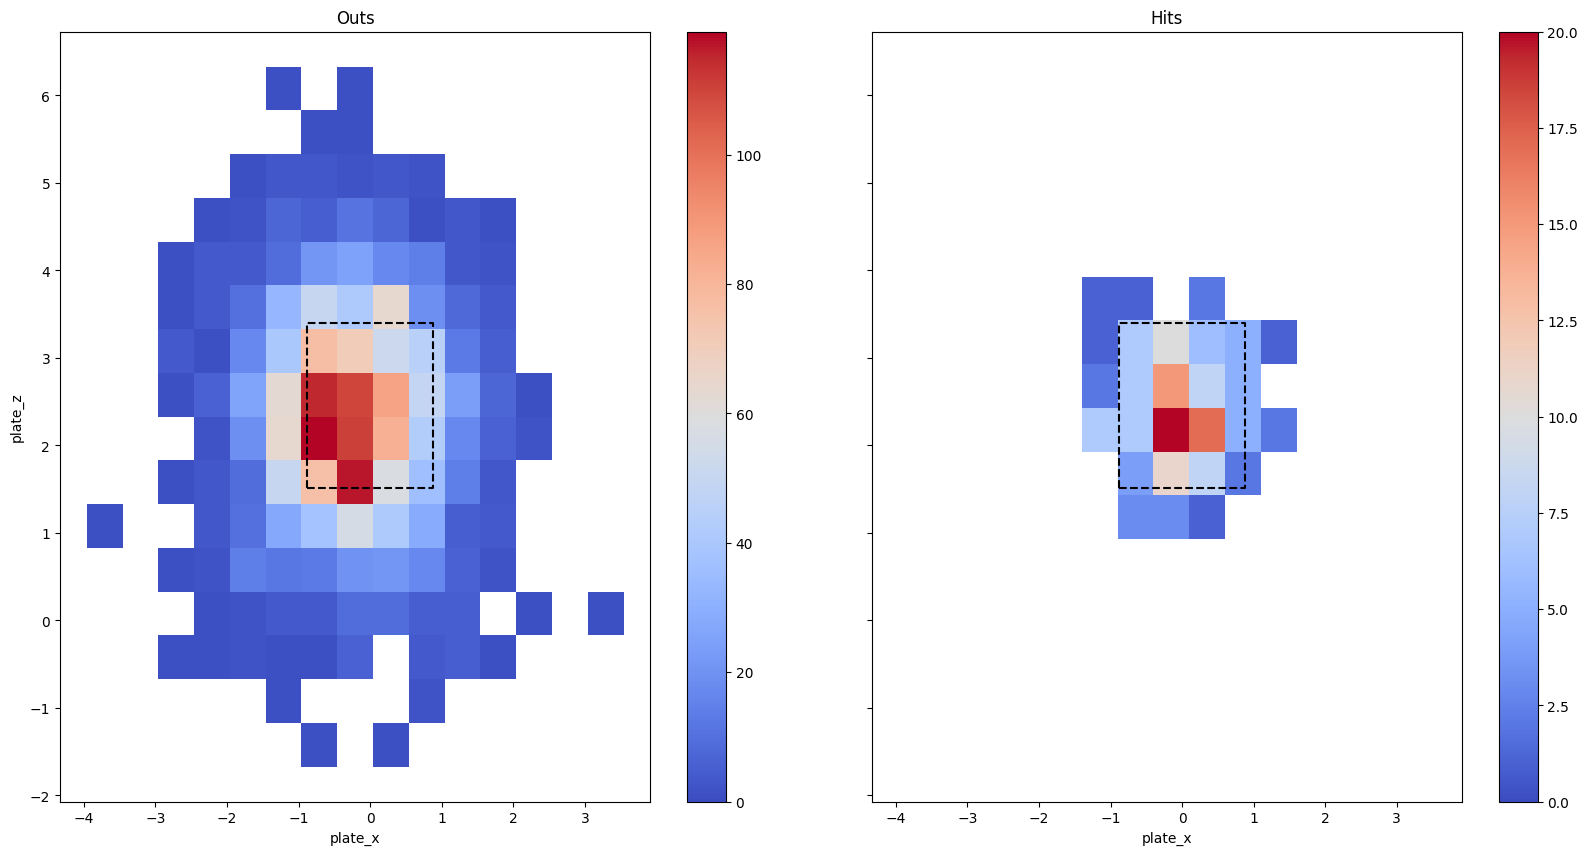

In [ ]:
import seaborn as sns

def plot_hit_vs_out(outs, hits):
    fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    # ストライクゾーンの座標
    x = [-0.88, 0.88, 0.88, -0.88, -0.88]
    y = [1.51, 1.51, 3.4, 3.4, 1.51]

    sns.histplot(data=outs, x='plate_x', y='plate_z', cmap="coolwarm", cbar=True, ax=axs[0], binwidth=0.5)
    axs[0].plot(x, y, linestyle='--', color='black')
    axs[0].set_title('Outs')

    sns.histplot(data=hits, x='plate_x', y='plate_z', cmap="coolwarm", cbar=True, ax=axs[1], binwidth=0.5)
    axs[1].plot(x, y, linestyle='--', color='black')
    axs[1].set_title('Hits')

    plt.show()

plot_hit_vs_out(outs, hits)


In [ ]:
# Hitの色を変える

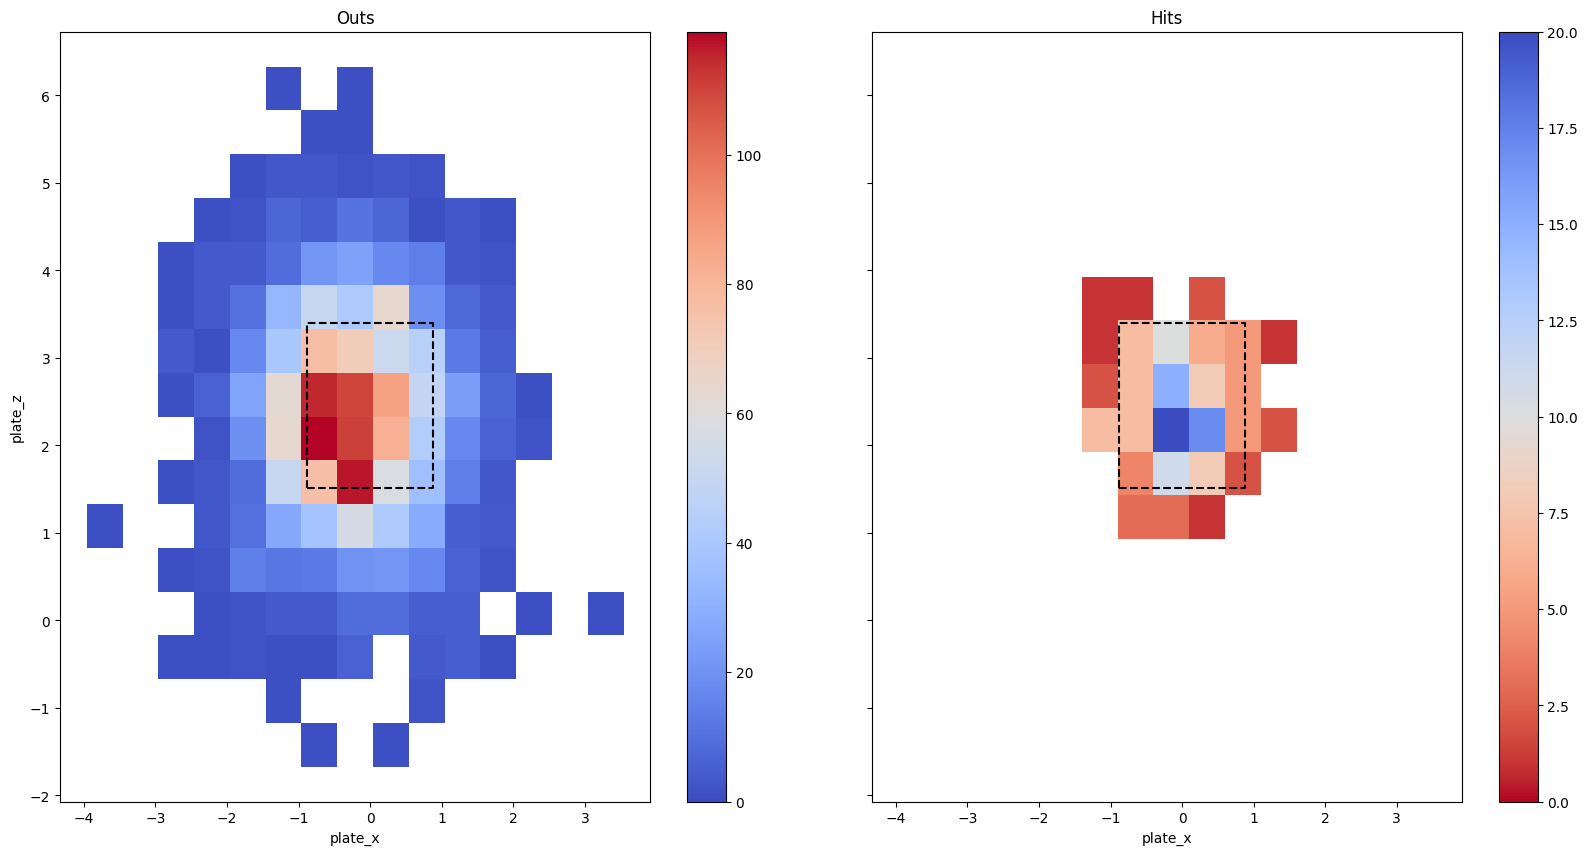

In [ ]:
import seaborn as sns

def plot_hit_vs_out(outs, hits):
    fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    # ストライクゾーンの座標
    x = [-0.88, 0.88, 0.88, -0.88, -0.88]
    y = [1.51, 1.51, 3.4, 3.4, 1.51]

    sns.histplot(data=outs, x='plate_x', y='plate_z', cmap="coolwarm", cbar=True, ax=axs[0], binwidth=0.5)
    axs[0].plot(x, y, linestyle='--', color='black')
    axs[0].set_title('Outs')

    sns.histplot(data=hits, x='plate_x', y='plate_z', cmap="coolwarm_r", cbar=True, ax=axs[1], binwidth=0.5)
    axs[1].plot(x, y, linestyle='--', color='black')
    axs[1].set_title('Hits')

    plt.show()

plot_hit_vs_out(outs, hits)


割合を見れるか

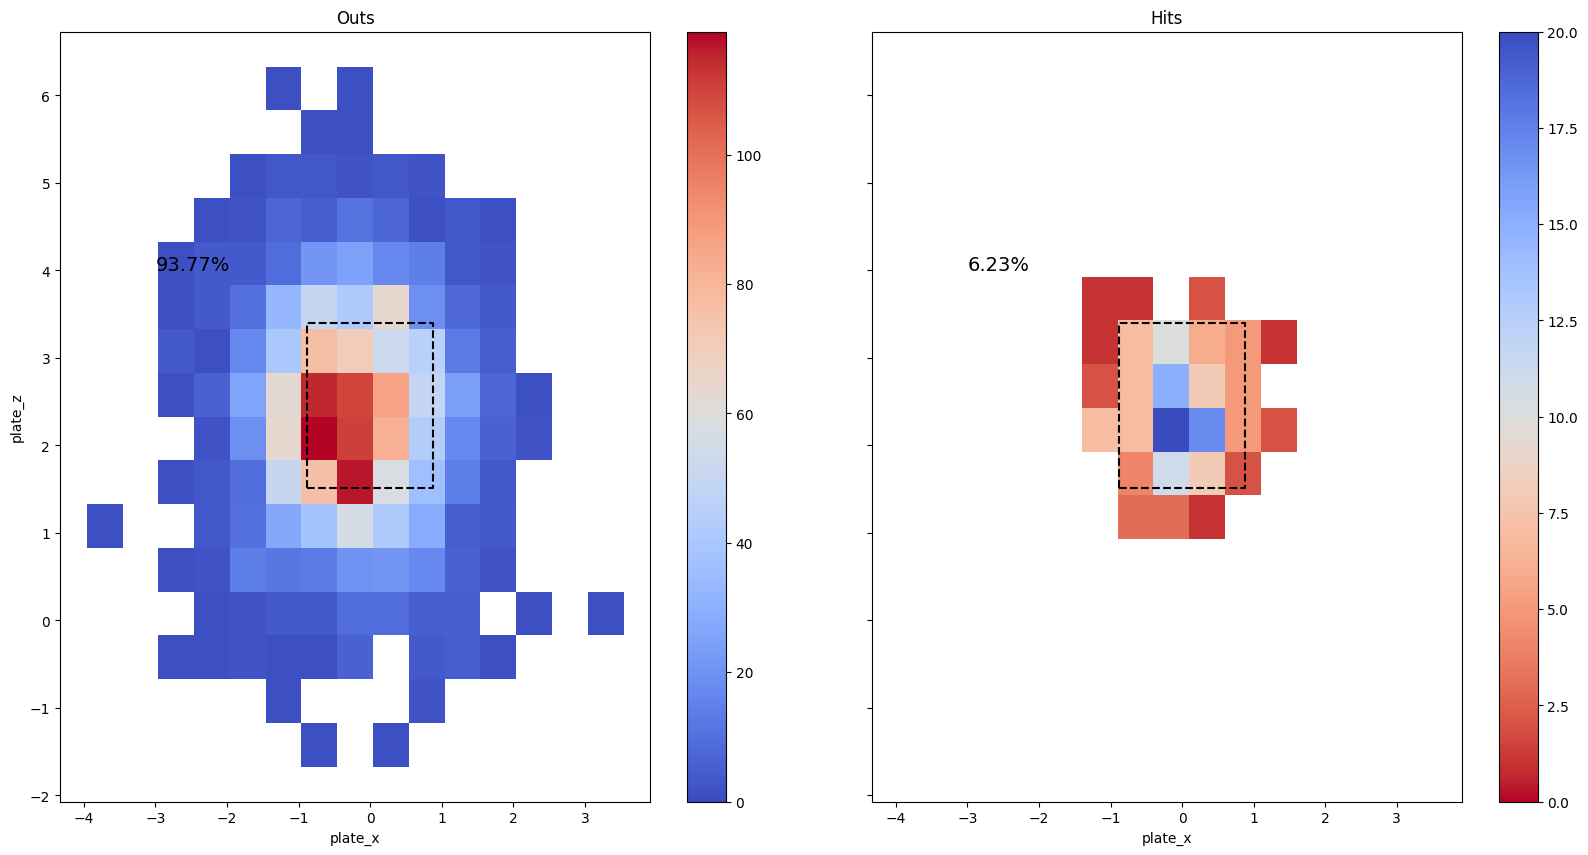

In [ ]:
import seaborn as sns

def plot_hit_vs_out(outs, hits):
    fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    # ストライクゾーンの座標
    x = [-0.88, 0.88, 0.88, -0.88, -0.88]
    y = [1.51, 1.51, 3.4, 3.4, 1.51]

    sns.histplot(data=outs, x='plate_x', y='plate_z', cmap="coolwarm", cbar=True, ax=axs[0], binwidth=0.5)
    axs[0].plot(x, y, linestyle='--', color='black')
    axs[0].set_title('Outs')

    sns.histplot(data=hits, x='plate_x', y='plate_z', cmap="coolwarm_r", cbar=True, ax=axs[1], binwidth=0.5)
    axs[1].plot(x, y, linestyle='--', color='black')
    axs[1].set_title('Hits')

    total_outs = len(outs)
    total_hits = len(hits)
    total_pitches = total_outs + total_hits

    out_ratio = total_outs / total_pitches * 100
    hit_ratio = total_hits / total_pitches * 100

    # エリアの割合を表示
    axs[0].annotate(f"{out_ratio:.2f}%", xy=(-3, 4), fontsize=14, color='black')
    axs[1].annotate(f"{hit_ratio:.2f}%", xy=(-3, 4), fontsize=14, color='black')

    plt.show()

plot_hit_vs_out(outs, hits)


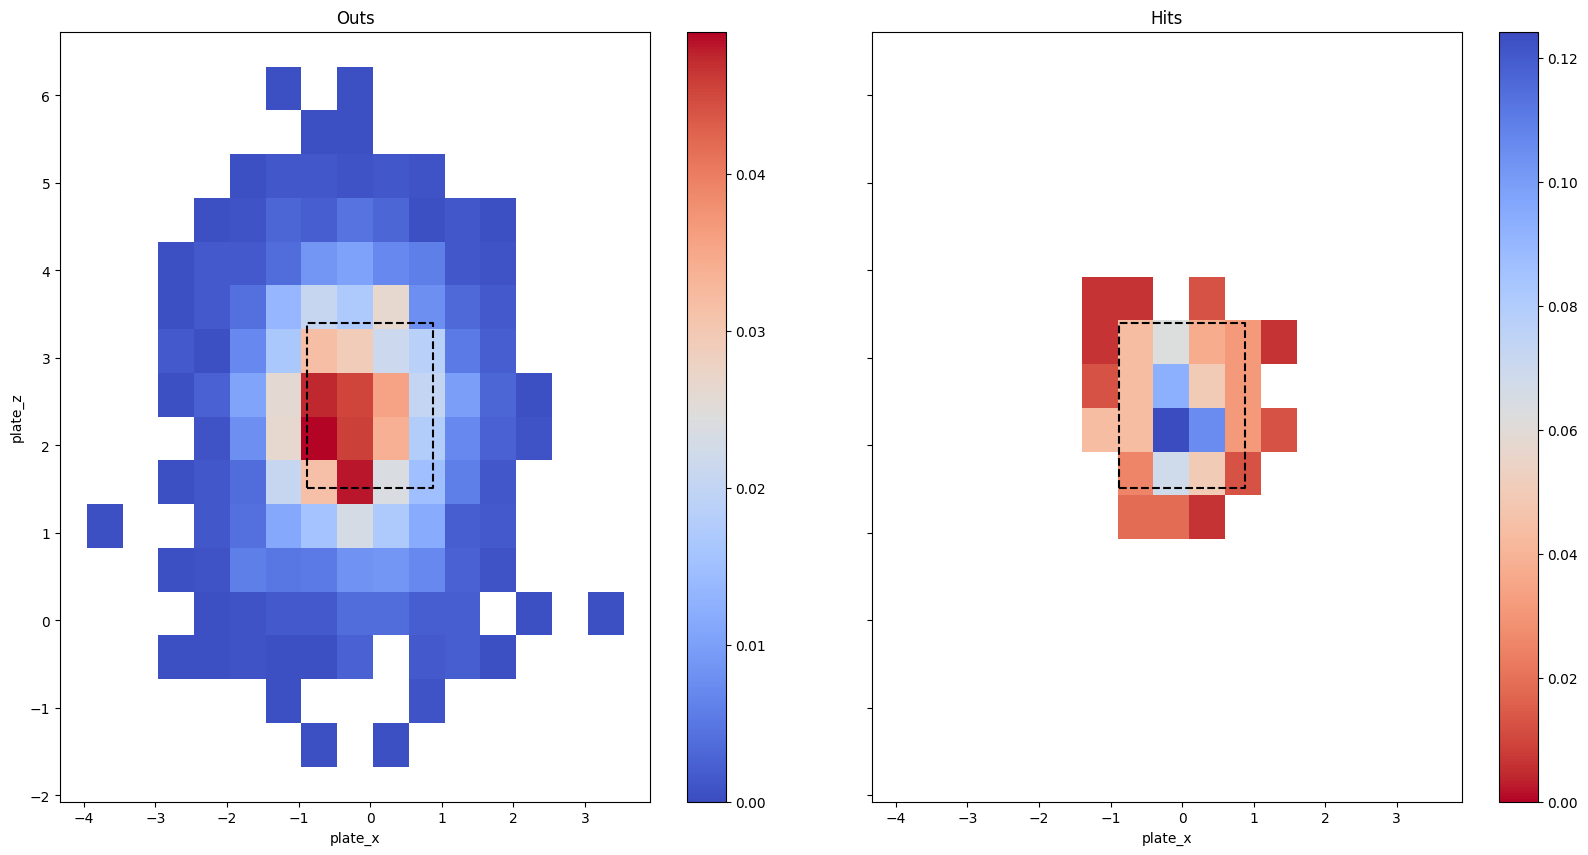

In [ ]:
import seaborn as sns

def plot_hit_vs_out(outs, hits):
    fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    # ストライクゾーンの座標
    x = [-0.88, 0.88, 0.88, -0.88, -0.88]
    y = [1.51, 1.51, 3.4, 3.4, 1.51]

    # エリアごとの割合を正規化
    outs_weights = [1 / len(outs)] * len(outs)
    hits_weights = [1 / len(hits)] * len(hits)

    sns.histplot(data=outs, x='plate_x', y='plate_z', cmap="coolwarm", cbar=True, ax=axs[0], binwidth=0.5, weights=outs_weights)
    axs[0].plot(x, y, linestyle='--', color='black')
    axs[0].set_title('Outs')

    sns.histplot(data=hits, x='plate_x', y='plate_z', cmap="coolwarm_r", cbar=True, ax=axs[1], binwidth=0.5, weights=hits_weights)
    axs[1].plot(x, y, linestyle='--', color='black')
    axs[1].set_title('Hits')

    plt.show()

plot_hit_vs_out(outs, hits)


型を変更する

pitch_type                       object
game_date                datetime64[ns]
release_speed                   Float64
release_pos_x                   Float64
release_pos_z                   Float64
                              ...      
if_fielding_alignment            object
of_fielding_alignment            object
spin_axis                         Int64
delta_home_win_exp              Float64
delta_run_exp                   Float64
Length: 92, dtype: object
pitch_type                       object
game_date                datetime64[ns]
release_speed                   Float64
release_pos_x                   Float64
release_pos_z                   Float64
                              ...      
if_fielding_alignment            object
of_fielding_alignment            object
spin_axis                         Int64
delta_home_win_exp              Float64
delta_run_exp                   Float64
Length: 92, dtype: object
pitch_type                       object
game_date                dat

<ipython-input-13-9ed4bee6e6ab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outs[['plate_x', 'plate_z']] = outs[['plate_x', 'plate_z']].astype(float)
<ipython-input-13-9ed4bee6e6ab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hits[['plate_x', 'plate_z']] = hits[['plate_x', 'plate_z']].astype(float)


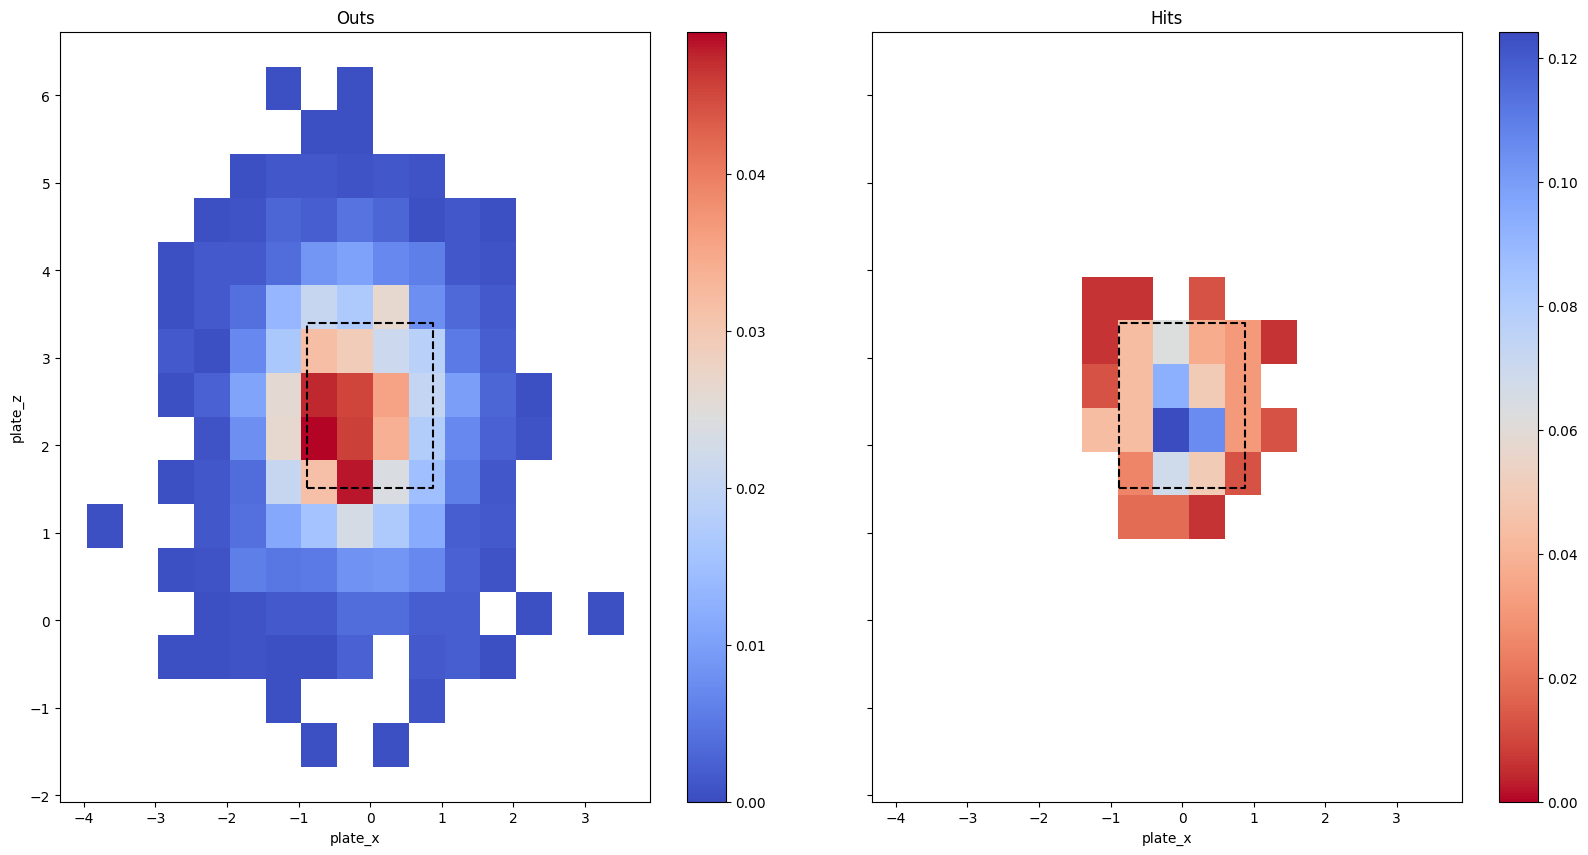

In [ ]:
# Check data types
print(outs.dtypes)
print(hits.dtypes)

# Convert 'plate_x' and 'plate_z' columns to float
outs[['plate_x', 'plate_z']] = outs[['plate_x', 'plate_z']].astype(float)
hits[['plate_x', 'plate_z']] = hits[['plate_x', 'plate_z']].astype(float)

# Check data types again
print(outs.dtypes)
print(hits.dtypes)

# Now try running the function again
plot_hit_vs_out(outs, hits)


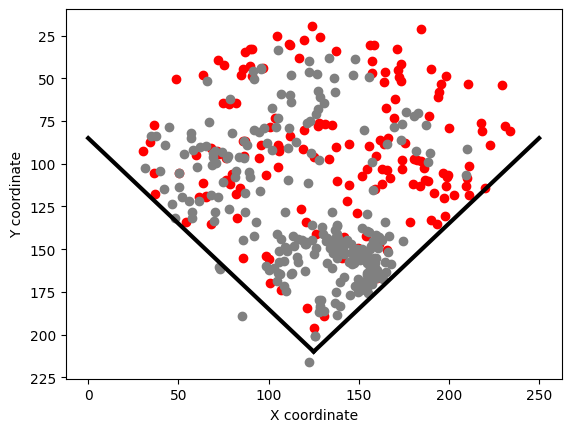

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for batter 660271 (Shohei Ohtani)
df_ohtani = df[df['batter'] == 660271]

# Define the list of events considered as hits (excluding hit_by_pitch)
hit_events = ['home_run', 'double', 'triple', 'single']

# Filter the data for hit events and remove rows with missing values in 'hc_x' and 'hc_y'
df_ohtani_hits = df_ohtani[df_ohtani['events'].isin(hit_events)].dropna(subset=['hc_x', 'hc_y'])
plt.scatter(df_ohtani_hits['hc_x'], df_ohtani_hits['hc_y'], color='red')

# Filter the data for other events (not considered as hits) and remove rows with missing values in 'hc_x' and 'hc_y'
df_ohtani_others = df_ohtani[~df_ohtani['events'].isin(hit_events)].dropna(subset=['hc_x', 'hc_y'])
plt.scatter(df_ohtani_others['hc_x'], df_ohtani_others['hc_y'], color='gray')

plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.gca().invert_yaxis()

# Draw the foul lines
plt.plot([125, 250], [210, 85], 'k-', lw=3)
plt.plot([125, 0], [210, 85], 'k-', lw=3)

plt.show()


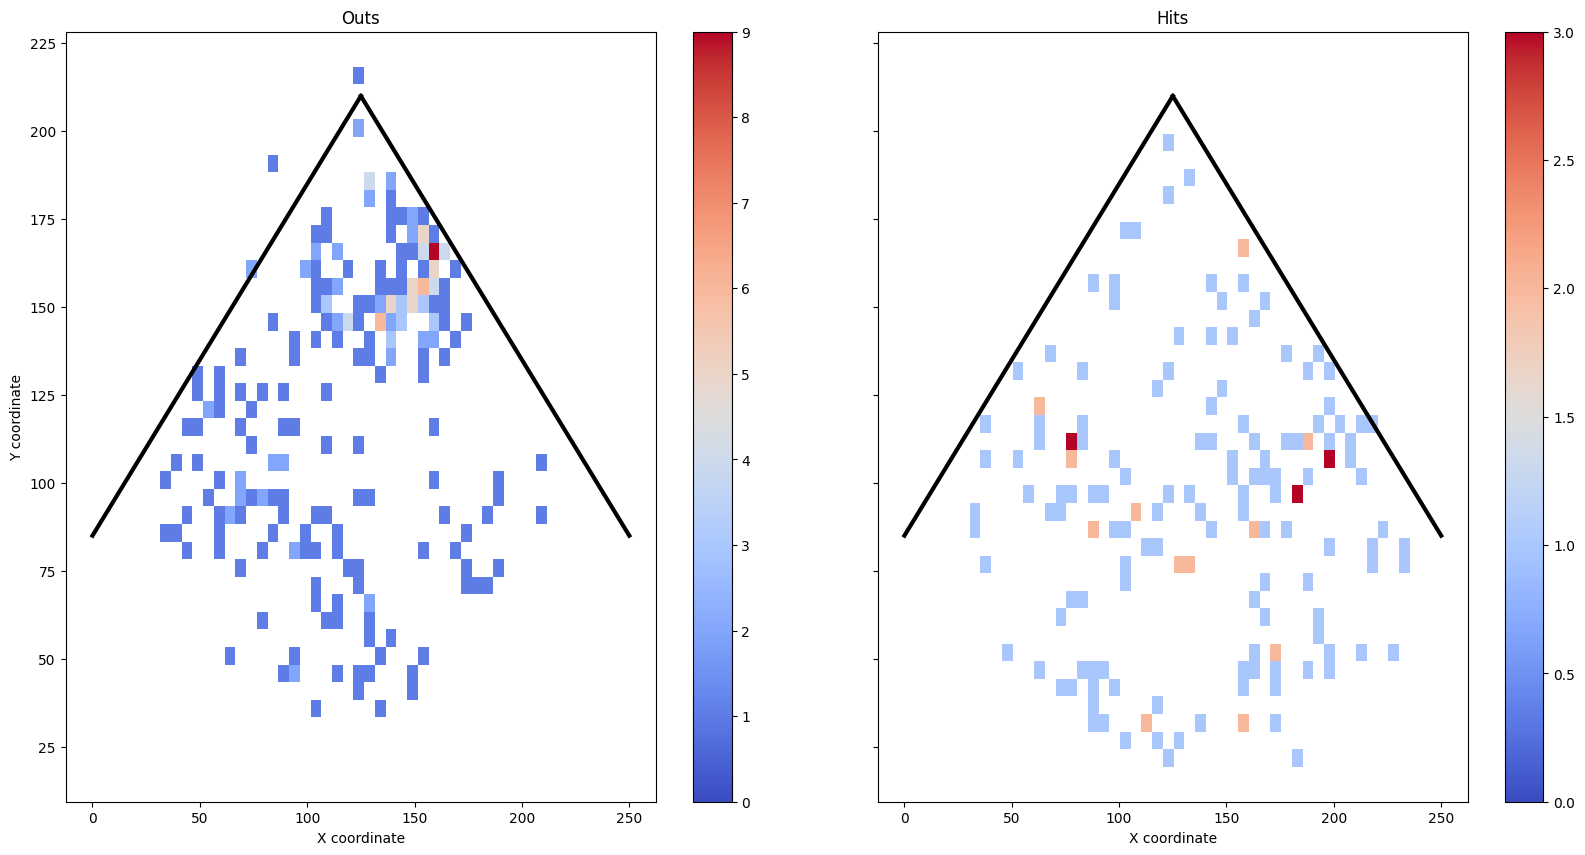

In [ ]:
import seaborn as sns

def plot_hit_vs_out(outs, hits):
    fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    # Draw the foul lines
    def draw_foul_lines(ax):
        ax.plot([125, 250], [210, 85], 'k-', lw=3)
        ax.plot([125, 0], [210, 85], 'k-', lw=3)

    sns.histplot(data=outs, x='hc_x', y='hc_y', cmap="coolwarm", cbar=True, ax=axs[0], binwidth=5)
    axs[0].set_title('Outs')
    axs[0].set_xlabel('X coordinate')
    axs[0].set_ylabel('Y coordinate')
    axs[0].invert_yaxis()
    draw_foul_lines(axs[0])

    sns.histplot(data=hits, x='hc_x', y='hc_y', cmap="coolwarm", cbar=True, ax=axs[1], binwidth=5)
    axs[1].set_title('Hits')
    axs[1].set_xlabel('X coordinate')
    axs[1].set_ylabel('Y coordinate')
    axs[1].invert_yaxis()
    draw_foul_lines(axs[1])

    plt.show()

plot_hit_vs_out(df_ohtani_others, df_ohtani_hits)


Y座標にマイナスをかける

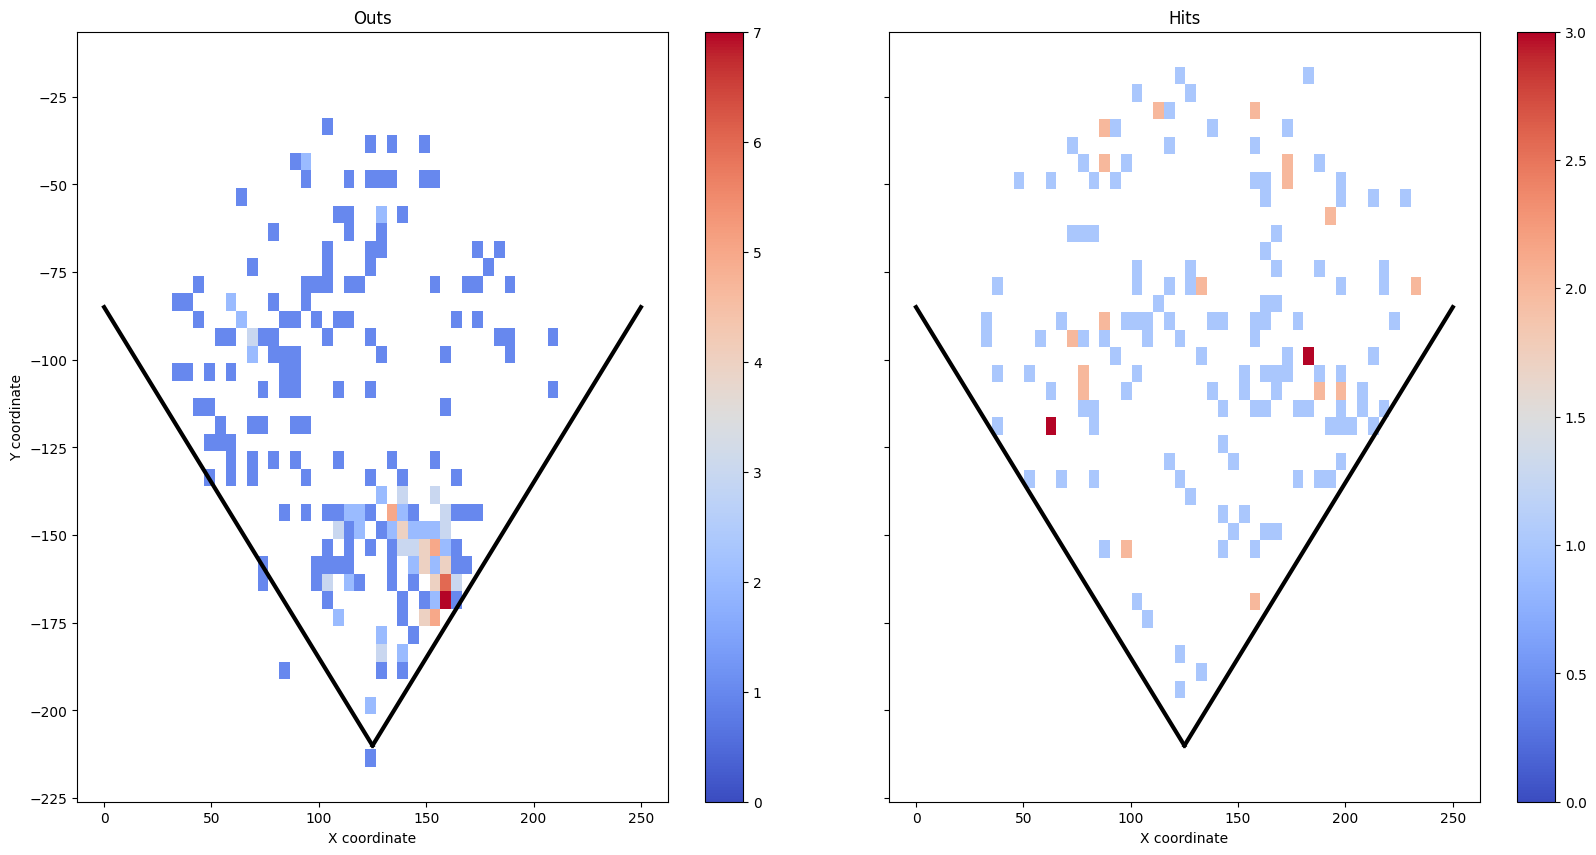

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_hit_vs_out(outs, hits):
    # Invert Y values
    outs['hc_y'] = -outs['hc_y']
    hits['hc_y'] = -hits['hc_y']

    fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    # Draw the foul lines
    def draw_foul_lines(ax):
        ax.plot([125, 250], [-210, -85], 'k-', lw=3)
        ax.plot([125, 0], [-210, -85], 'k-', lw=3)

    sns.histplot(data=outs, x='hc_x', y='hc_y', cmap="coolwarm", cbar=True, ax=axs[0], binwidth=5)
    axs[0].set_title('Outs')
    axs[0].set_xlabel('X coordinate')
    axs[0].set_ylabel('Y coordinate')
    draw_foul_lines(axs[0])

    sns.histplot(data=hits, x='hc_x', y='hc_y', cmap="coolwarm", cbar=True, ax=axs[1], binwidth=5)
    axs[1].set_title('Hits')
    axs[1].set_xlabel('X coordinate')
    axs[1].set_ylabel('Y coordinate')
    draw_foul_lines(axs[1])

    plt.show()

plot_hit_vs_out(df_ohtani_others, df_ohtani_hits)


binwidth=10

いちいち反転するコードなので、注意。


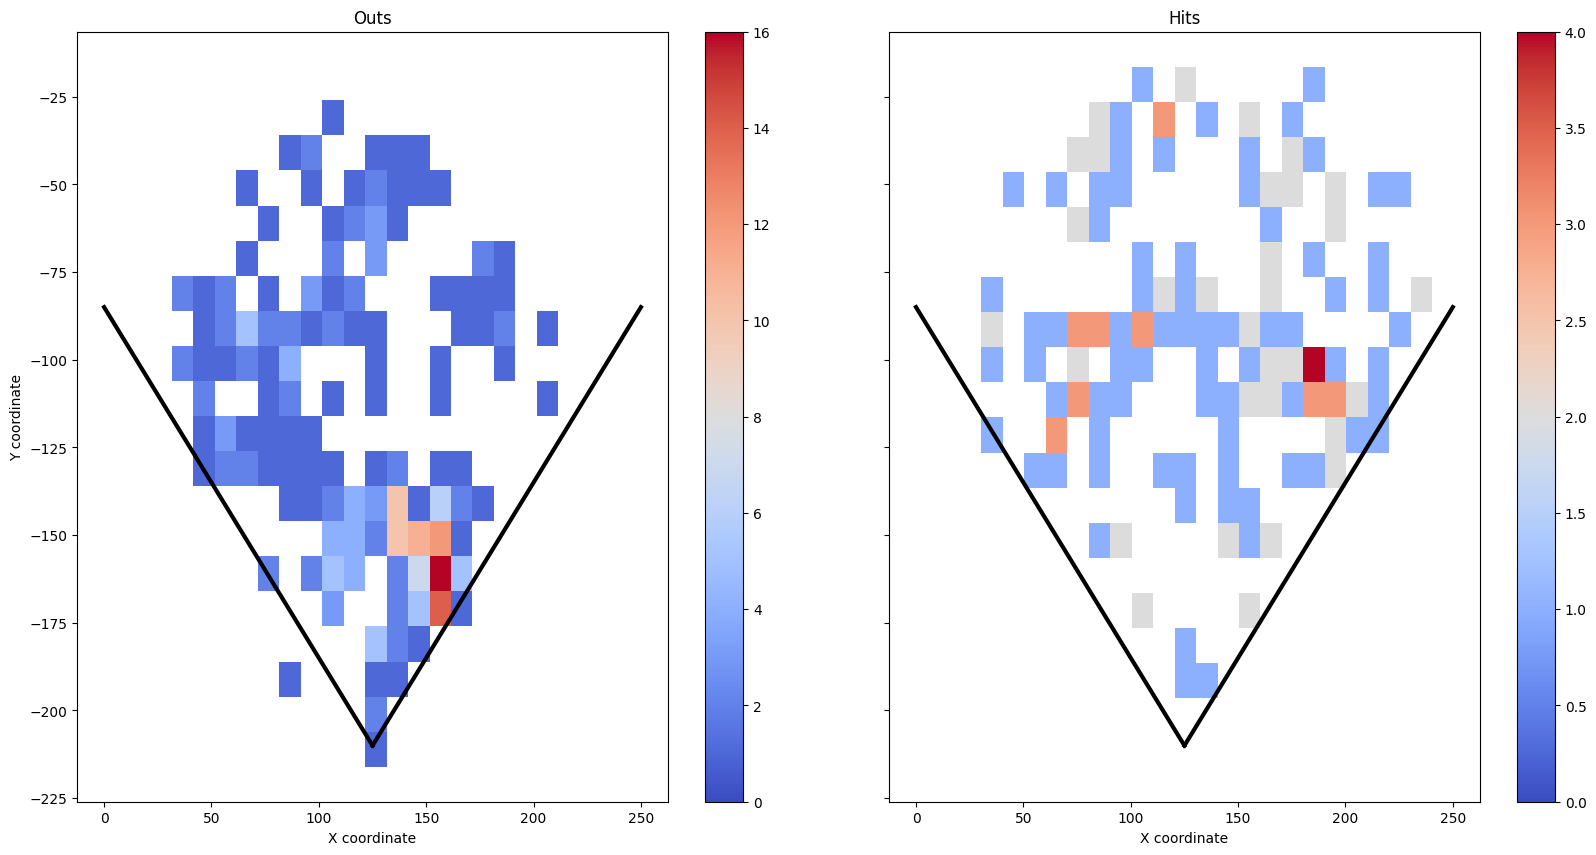

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_hit_vs_out(outs, hits):
    # Invert Y values
    outs['hc_y'] = -outs['hc_y']
    hits['hc_y'] = -hits['hc_y']

    fig, axs = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
    plt.subplots_adjust(wspace=0.1, hspace=0.1)

    # Draw the foul lines
    def draw_foul_lines(ax):
        ax.plot([125, 250], [-210, -85], 'k-', lw=3)
        ax.plot([125, 0], [-210, -85], 'k-', lw=3)

    sns.histplot(data=outs, x='hc_x', y='hc_y', cmap="coolwarm", cbar=True, ax=axs[0], binwidth=10)
    axs[0].set_title('Outs')
    axs[0].set_xlabel('X coordinate')
    axs[0].set_ylabel('Y coordinate')
    draw_foul_lines(axs[0])

    sns.histplot(data=hits, x='hc_x', y='hc_y', cmap="coolwarm", cbar=True, ax=axs[1], binwidth=10)
    axs[1].set_title('Hits')
    axs[1].set_xlabel('X coordinate')
    axs[1].set_ylabel('Y coordinate')
    draw_foul_lines(axs[1])

    plt.show()

plot_hit_vs_out(df_ohtani_others, df_ohtani_hits)
